In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Load the dataset from the CSV file
file_path = 'incendies_meteo_safe.csv'
df = pd.read_csv(file_path, sep=';', encoding='utf-8')

C:\Users\Antoine Dupont\AppData\Local\Temp\ipykernel_12720\726800850.py:3: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep=';', encoding='utf-8')


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29731 entries, 0 to 29730
Data columns (total 34 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Année                                       29731 non-null  int64  
 1   Numéro                                      29731 non-null  int64  
 2   Département                                 29731 non-null  object 
 3   Code INSEE                                  29731 non-null  object 
 4   Nom de la commune                           29704 non-null  object 
 5   Date de première alerte                     29731 non-null  object 
 6   Surface parcourue (m2)                      29731 non-null  int64  
 7   Surface forêt (m2)                          21004 non-null  float64
 8   Surface maquis garrigues (m2)               8808 non-null   float64
 9   Autres surfaces naturelles hors forêt (m2)  14535 non-null  float64
 10  Surfaces a

In [24]:
df['Date de première alerte'] = pd.to_datetime(df['Date de première alerte'], errors='coerce')

In [25]:
# Step 1: Drop useless or low-information columns
threshold = 0.1  # Keep columns with at least 10% non-null
min_count = int(threshold * len(df))
df = df.dropna(axis=1, thresh=min_count)

# Drop known non-useful columns
columns_to_drop = ["weather", "Décès ou bâtiments touchés", "Précision des surfaces"]
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# Step 2: Convert date
df["Date de première alerte"] = pd.to_datetime(df["Date de première alerte"], errors='coerce')

# Step 3: Ensure numeric columns
for col in df.columns:
    if df[col].dtype == "object" and col != "Nom de la commune" and col != "Code INSEE" and col != "Département":
        try:
            df[col] = pd.to_numeric(df[col], errors="coerce")
        except:
            continue

# Step 4: Drop rows missing core weather or surface info
core_columns = ["temp", "humidity", "pressure", "wind_speed", "Surface parcourue (m2)"]
df = df.dropna(subset=core_columns)

# Optional: Reset index
df = df.reset_index(drop=True)

In [26]:
df = df.drop(columns=['Surface autres terres boisées (m2)', 'Surfaces non boisées naturelles (m2)','Surfaces non boisées artificialisées (m2)','Surfaces non boisées (m2)'])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25069 entries, 0 to 25068
Data columns (total 22 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   Année                                       25069 non-null  int64         
 1   Numéro                                      25069 non-null  int64         
 2   Département                                 25069 non-null  object        
 3   Code INSEE                                  25069 non-null  object        
 4   Nom de la commune                           25044 non-null  object        
 5   Date de première alerte                     25069 non-null  datetime64[ns]
 6   Surface parcourue (m2)                      25069 non-null  int64         
 7   Surface forêt (m2)                          18542 non-null  float64       
 8   Surface maquis garrigues (m2)               6632 non-null   float64       
 9   Autres

In [28]:
df['Année'] = df['Date de première alerte'].dt.year
df['Mois'] = df['Date de première alerte'].dt.month
df['Jour'] = df['Date de première alerte'].dt.day

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25069 entries, 0 to 25068
Data columns (total 24 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   Année                                       25069 non-null  int32         
 1   Numéro                                      25069 non-null  int64         
 2   Département                                 25069 non-null  object        
 3   Code INSEE                                  25069 non-null  object        
 4   Nom de la commune                           25044 non-null  object        
 5   Date de première alerte                     25069 non-null  datetime64[ns]
 6   Surface parcourue (m2)                      25069 non-null  int64         
 7   Surface forêt (m2)                          18542 non-null  float64       
 8   Surface maquis garrigues (m2)               6632 non-null   float64       
 9   Autres

In [30]:
incendies_par_dept = df.groupby('Département').size().sort_values(ascending=False)

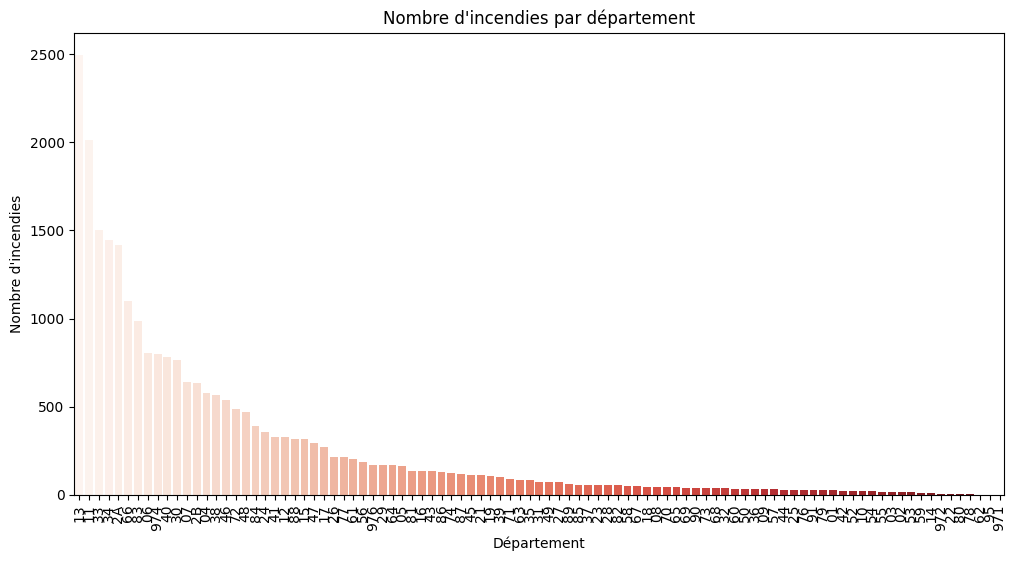

In [31]:
plt.figure(figsize=(12,6))
sns.barplot(x=incendies_par_dept.index, y=incendies_par_dept.values, hue=incendies_par_dept.index, palette="Reds", legend=False)
plt.title("Nombre d'incendies par département")
plt.xlabel("Département")
plt.ylabel("Nombre d'incendies")
plt.xticks(rotation=90)
plt.show()

C:\Users\Antoine Dupont\AppData\Local\Temp\ipykernel_12720\4026742702.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nature_counts.index, y=nature_counts.values, palette="viridis")


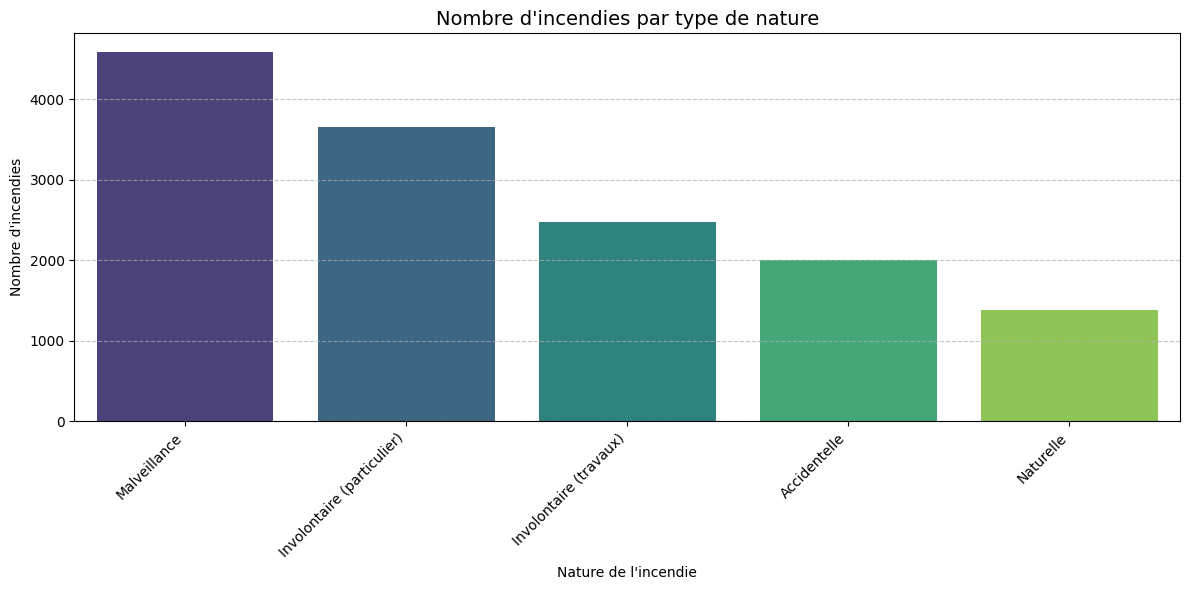

In [39]:

# Supprimer les lignes avec Nature manquante
df_nature = df.dropna(subset=["Nature"])

# Compter les incendies par type de nature
nature_counts = df_nature["Nature"].value_counts().sort_values(ascending=False)

# Tracer le graphique
plt.figure(figsize=(12, 6))
sns.barplot(x=nature_counts.index, y=nature_counts.values, palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title("Nombre d'incendies par type de nature", fontsize=14)
plt.xlabel("Nature de l'incendie")
plt.ylabel("Nombre d'incendies")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


C:\Users\Antoine Dupont\AppData\Local\Temp\ipykernel_12720\2241735772.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_surface_by_nature.index, y=avg_surface_by_nature.values, palette="magma")


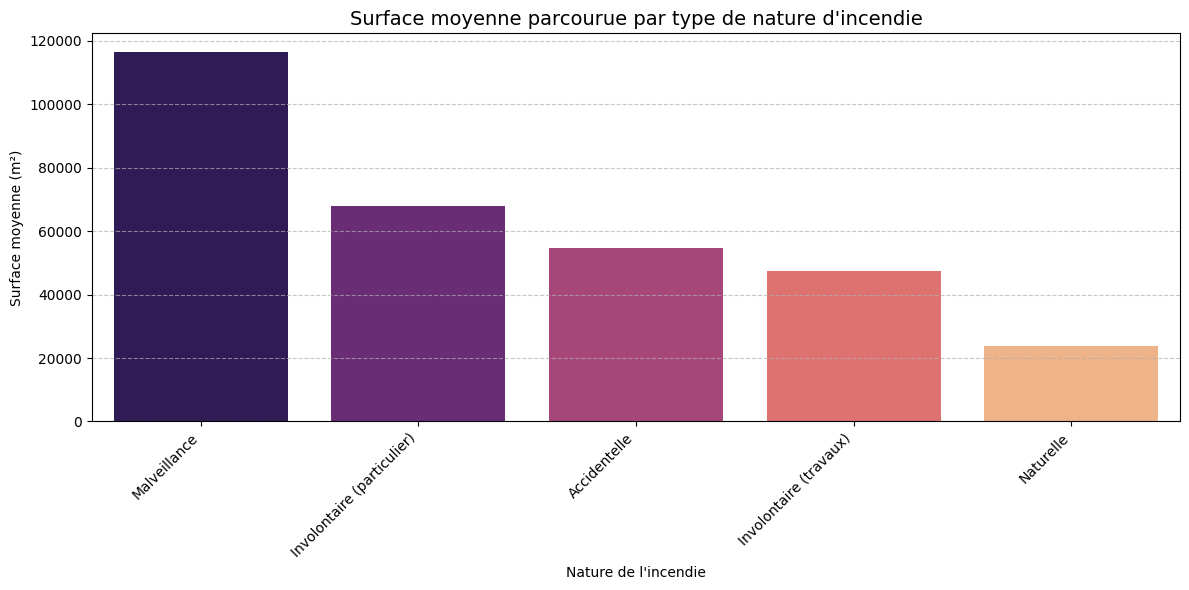

In [40]:
# Nettoyage : supprimer les lignes sans Nature ou Surface parcourue
df_clean = df.dropna(subset=["Nature", "Surface parcourue (m2)"])

# Calculer la surface moyenne parcourue par Nature
avg_surface_by_nature = (
    df_clean.groupby("Nature")["Surface parcourue (m2)"]
    .mean()
    .sort_values(ascending=False)
)

# Tracer le graphique
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_surface_by_nature.index, y=avg_surface_by_nature.values, palette="magma")
plt.xticks(rotation=45, ha="right")
plt.title("Surface moyenne parcourue par type de nature d'incendie", fontsize=14)
plt.xlabel("Nature de l'incendie")
plt.ylabel("Surface moyenne (m²)")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [32]:
incendies_par_mois = df.groupby('Mois').size()

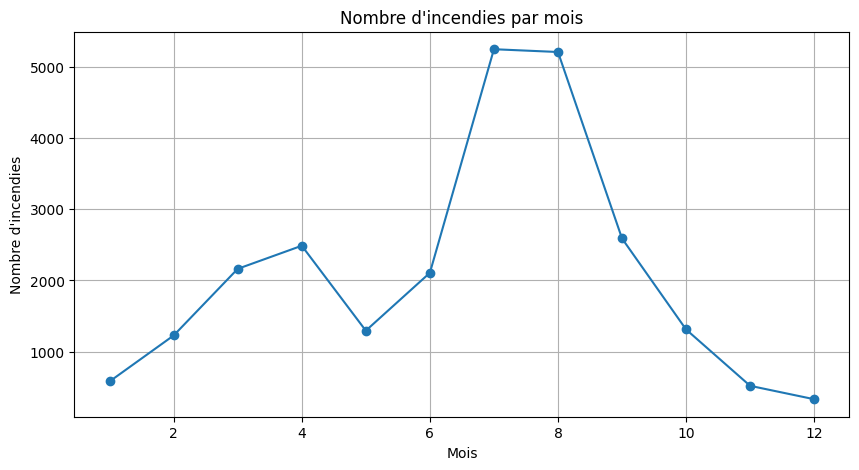

In [33]:
plt.figure(figsize=(10,5))
incendies_par_mois.plot(kind='line', marker='o')
plt.title("Nombre d'incendies par mois")
plt.xlabel("Mois")
plt.ylabel("Nombre d'incendies")
plt.grid(True)
plt.show()

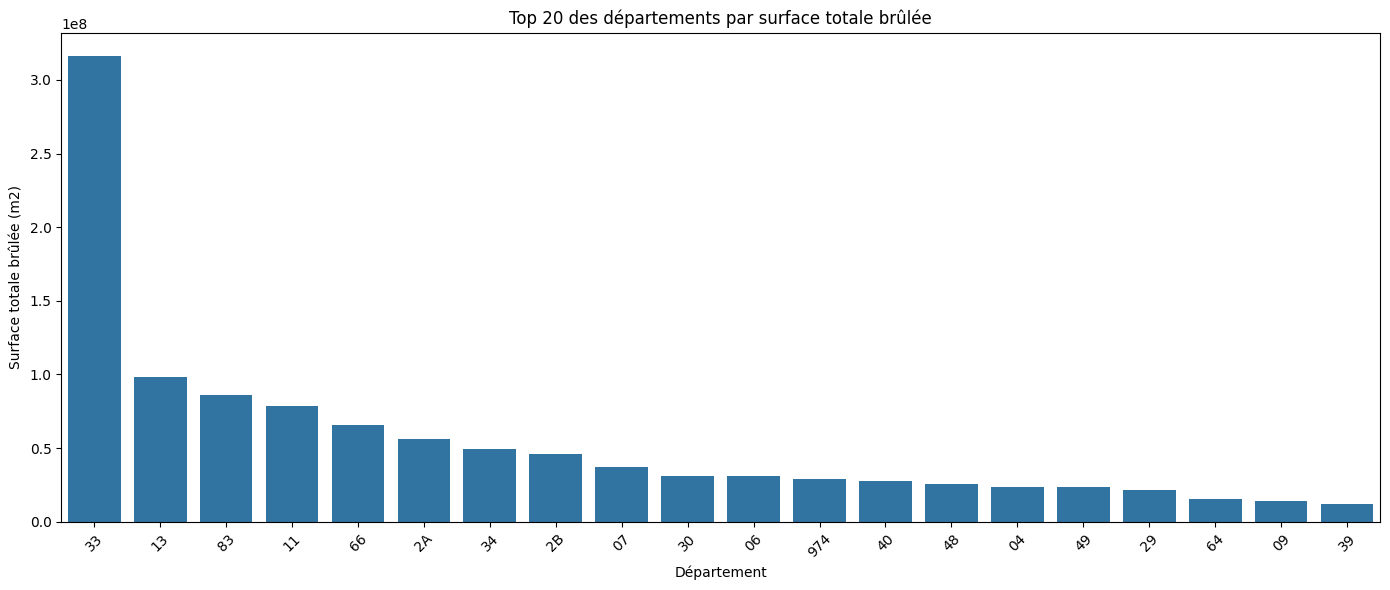

In [34]:
# Plot: Surface totale brûlée par département (Top 20)
df_grouped = df.groupby('Département')['Surface parcourue (m2)'].sum().reset_index()
df_grouped = df_grouped.sort_values(by='Surface parcourue (m2)', ascending=False).head(20)

plt.figure(figsize=(14, 6))
sns.barplot(data=df_grouped, x='Département', y='Surface parcourue (m2)')
plt.title('Top 20 des départements par surface totale brûlée')
plt.xlabel('Département')
plt.ylabel('Surface totale brûlée (m2)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

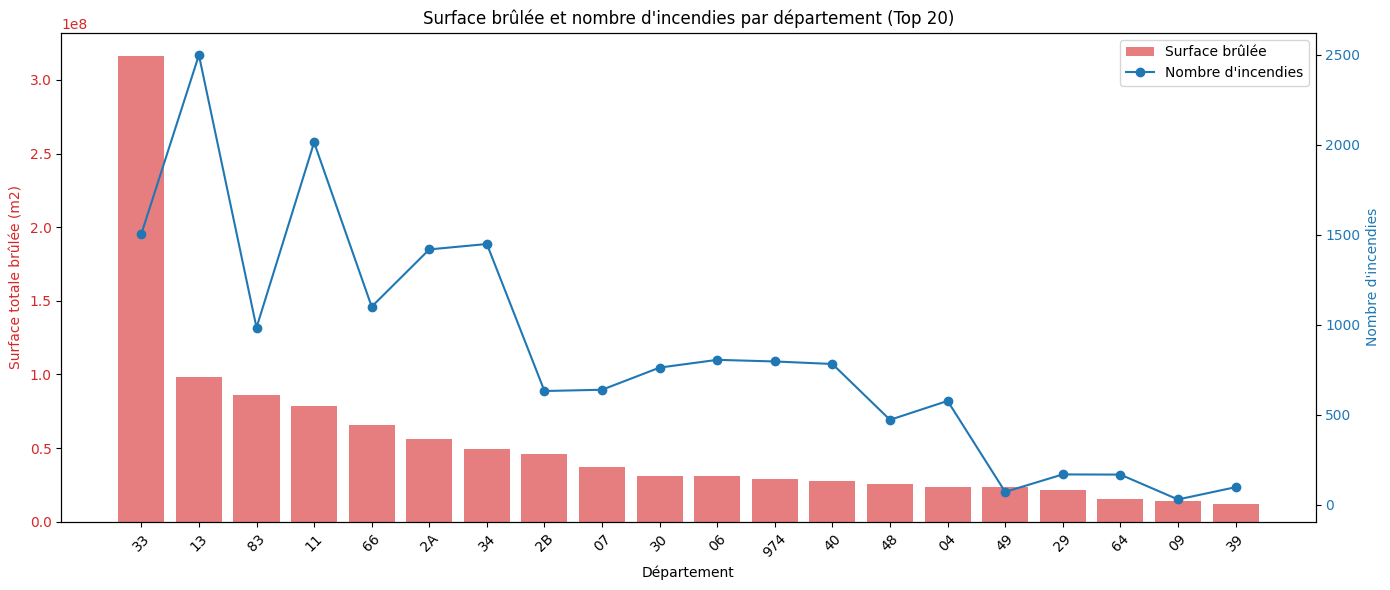

In [35]:
# Grouper les données par département
df_grouped = df.groupby('Département').agg({'Surface parcourue (m2)': 'sum', 'Numéro': 'count'}).reset_index()
df_grouped = df_grouped.sort_values(by='Surface parcourue (m2)', ascending=False).head(20)

# Créer le graphique
fig, ax1 = plt.subplots(figsize=(14, 6))

# Tracer la surface brûlée
color = 'tab:red'
ax1.set_xlabel('Département')
ax1.set_ylabel('Surface totale brûlée (m2)', color=color)
ax1.bar(df_grouped['Département'], df_grouped['Surface parcourue (m2)'], color=color, alpha=0.6, label='Surface brûlée')
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=45)

# Ajouter un deuxième axe y pour le nombre d'incendies
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Nombre d\'incendies', color=color)
ax2.plot(df_grouped['Département'], df_grouped['Numéro'], color=color, marker='o', label='Nombre d\'incendies')
ax2.tick_params(axis='y', labelcolor=color)

# Ajouter un titre et une légende
plt.title('Surface brûlée et nombre d\'incendies par département (Top 20)')
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.tight_layout()
plt.show()

C:\Users\Antoine Dupont\AppData\Local\Temp\ipykernel_12720\3776884239.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dept_counts.index, y=dept_counts.values, palette='viridis')


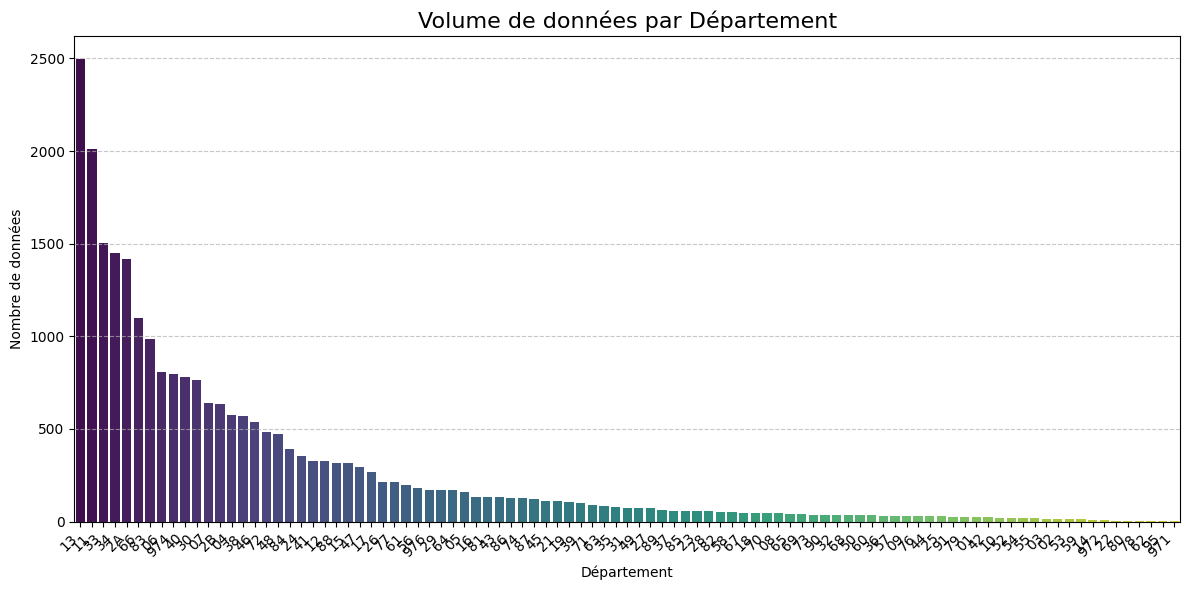

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compter les occurrences par département
dept_counts = df['Département'].value_counts().sort_values(ascending=False)

# Créer un graphique
plt.figure(figsize=(12, 6))
sns.barplot(x=dept_counts.index, y=dept_counts.values, palette='viridis')

plt.title('Volume de données par Département', fontsize=16)
plt.xlabel('Département')
plt.ylabel('Nombre de données')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


                            temp  humidity  pressure  wind_speed  wind_deg  \
temp                    1.000000 -0.591241 -0.409469    0.068816  0.079405   
humidity               -0.591241  1.000000  0.102144   -0.197953 -0.168637   
pressure               -0.409469  0.102144  1.000000   -0.085054 -0.026221   
wind_speed              0.068816 -0.197953 -0.085054    1.000000  0.230365   
wind_deg                0.079405 -0.168637 -0.026221    0.230365  1.000000   
rain_1h                -0.063524  0.181837 -0.074552   -0.010772 -0.019049   
Surface parcourue (m2)  0.075978 -0.086023 -0.013123    0.017755  0.016181   
Surface forêt (m2)      0.048830 -0.063901 -0.008656    0.014863  0.021468   

                         rain_1h  Surface parcourue (m2)  Surface forêt (m2)  
temp                   -0.063524                0.075978            0.048830  
humidity                0.181837               -0.086023           -0.063901  
pressure               -0.074552               -0.013123    

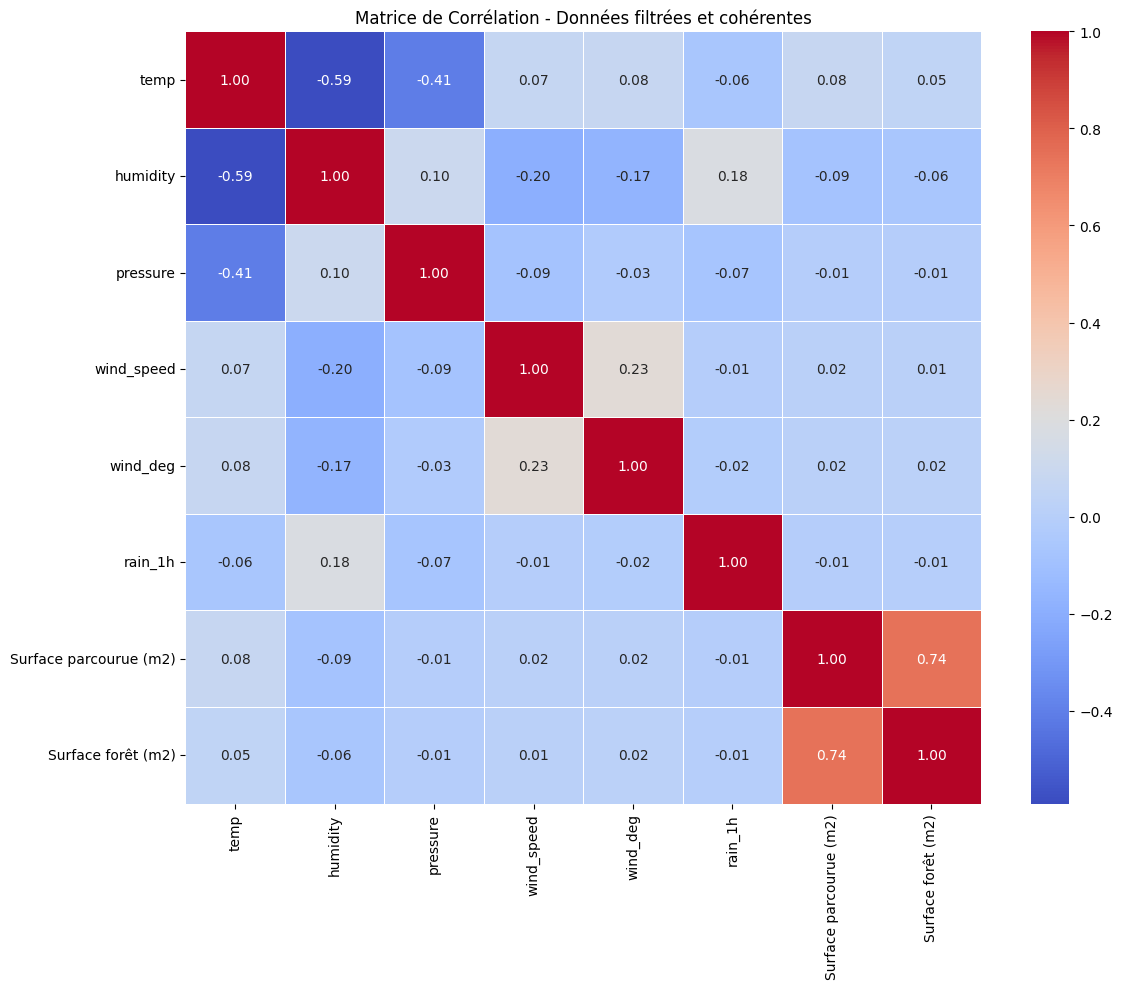

In [42]:
# Colonnes à convertir
columns_to_numeric = [
    'temp', 'humidity', 'pressure', 'wind_speed', 'wind_deg', 'clouds', 'rain_1h',
    'Surface parcourue (m2)', 'Surface forêt (m2)', 'Surface maquis garrigues (m2)',
    'Autres surfaces naturelles hors forêt (m2)', 'Surfaces agricoles (m2)',
    'Autres surfaces (m2)', 'Surface autres terres boisées (m2)',
    'Surfaces non boisées naturelles (m2)', 'Surfaces non boisées artificialisées (m2)',
    'Surfaces non boisées (m2)'
]

# Conversion forcée en numérique
for col in columns_to_numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Filtrage : on garde les lignes avec données météo & surface parcourue non nulles
filtered = df.dropna(subset=['temp', 'humidity', 'pressure', 'wind_speed', 'Surface parcourue (m2)'])

# Supprimer les valeurs extrêmes (ex: top 1% de surface brûlée)
q99 = filtered['Surface parcourue (m2)'].quantile(0.99)
filtered = filtered[filtered['Surface parcourue (m2)'] < q99]

# Sélectionner les colonnes numériques utiles
df_corr = filtered[columns_to_numeric].dropna(axis=1, thresh=int(len(filtered)*0.7))  # garder si >70% non null
df_corr = df_corr.dropna()  # supprimer lignes incomplètes

# Calcul de la corrélation
corr_matrix = df_corr.corr()

print(corr_matrix)

# Affichage
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Matrice de Corrélation - Données filtrées et cohérentes")
plt.tight_layout()
plt.show()
